# Imports

This Lab uses numpy, matplotlib, pillow, pandas, scipy, scikit-learn and scikit-image.

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
print(1)

1


In [2]:
df=pd.read_csv("spotify_history.csv")
arrShuffle=df["shuffle"]
arrReason_End=df["reason_end"]
arrMs_Played=df["ms_played"]
arrReason_Start=df["reason_start"]

i=0
print(len(arrReason_End))
for x in range(len(arrReason_End)):
    if(arrReason_End[x]=="trackdone"): #if the listener finished the song
        arrReason_End[x]=1 #set value equal to 1
        i+=1
    else:
        arrReason_End[x]=0 #else set value equal to 0
print(i)


149860


/var/folders/wz/s7pdzspx7mn7qk2yz5670vn00000gn/T/ipykernel_86329/2800120256.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrReason_End[x]=0 #else set value equal to 0
/var/folders/wz/s7pdzspx7mn7qk2yz5670vn00000gn/T/ipykernel_86329/2800120256.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arrReason_End[x]=1 #set value equal to 1


77194


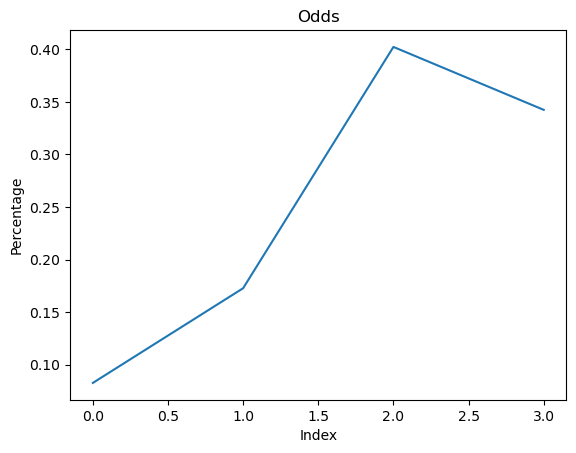

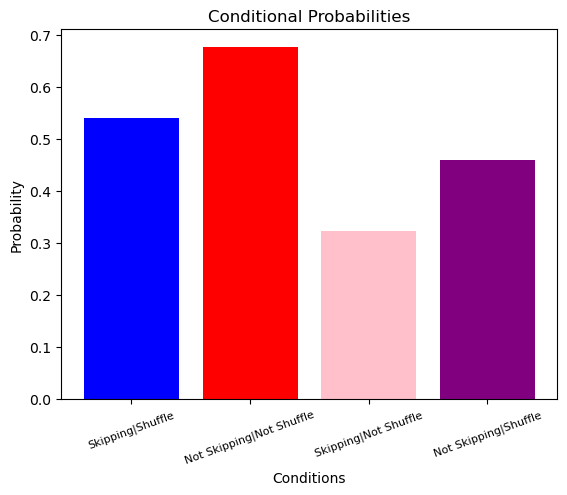

In [3]:
odds=[0,0,0,0]
odds[0]=0
odds[1]=0
odds[2]=0
odds[3]=0

onShuffle_Skip = 0
shuffle = 0
notShuffle_notSkip = 0
notShuffle = 0
notShuffle_Skip = 0
onShuffle_notSkip = 0

for x in range(len(arrShuffle)):
    if(arrShuffle[x]==arrShuffle[0] and arrReason_End[x]==0): #if listener was not on shuffle when playing track and they did not finish the song
        odds[0]+=1
        notShuffle_Skip += 1
    elif(arrShuffle[x]==arrShuffle[0] and arrReason_End[x]==1): #if the listener was not on shuffle when playing track and they did finish the song
        odds[1]+=1
        notShuffle_notSkip += 1
    elif(arrShuffle[x]!=arrShuffle[0] and arrReason_End[x]==0): #if the listener was on shuffle while playing the track and they did not finish the song
        odds[2]+=1
        onShuffle_Skip += 1
    else: #if the listener was on shuffle while playing the track and they did finish the song
        odds[3]+=1 
        onShuffle_notSkip += 1


        
odds[0]=odds[0]/len(arrShuffle) #prob of skipping song if listener is not on shuffle/ all shuffle
odds[1]=odds[1]/len(arrShuffle) #prob of finishing song if listener is not on shuffle/ all shuffle
odds[2]=odds[2]/len(arrShuffle) #prob of skipping song if listener is on shuffle/ all shuffle
odds[3]=odds[3]/len(arrShuffle) #prob of finishing song if listener is on shuffle/ all shuffle

plt.plot(range(len(odds)),odds)
plt.xlabel("Index")
plt.ylabel("Percentage")
plt.title("Odds")

plt.show()


for i in range(len(arrShuffle)):
  if arrShuffle[i] != arrShuffle[0]:
    shuffle += 1
  else:
    notShuffle += 1

# P(Skipping a song | We are on shuffle)
p1 = onShuffle_Skip / shuffle

# P(Not skipping | We are not on shuffle)
p2 = notShuffle_notSkip / notShuffle

# P(Skipping a song | We are not on shuffle)
p3 = notShuffle_Skip / notShuffle

# P(Not skipping | We are on shuffle)
p4 = onShuffle_notSkip / shuffle

positions = [0, 1, 2, 3]  # positions for bars
plt.bar([x for x in positions], [p1, p2, p3, p4], color=["blue", "red", "pink", "purple"])

plt.xticks(positions, ["Skipping|Shuffle", "Not Skipping|Not Shuffle", "Skipping|Not Shuffle", "Not Skipping|Shuffle"], fontsize=8, rotation=20)
plt.xlabel("Conditions")
plt.ylabel("Probability")
plt.title("Conditional Probabilities")

plt.show()


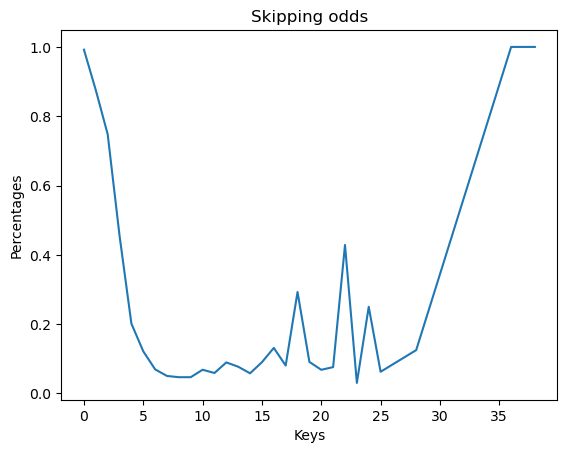

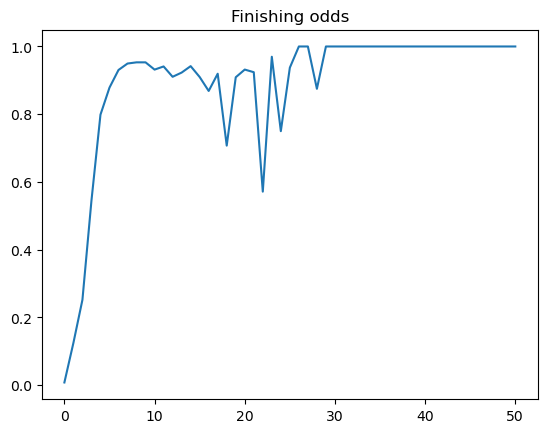

In [4]:
skippedMS={}
finishedMS={}

for x in range(len(arrMs_Played)):
    if(arrReason_End[x]==1):
        if(arrMs_Played[x]//31222.5 not in finishedMS):
            finishedMS.update({arrMs_Played[x]//31222.5:1})
        else:
            finishedMS[arrMs_Played[x]//31222.5]+=1
    else:
        if(arrMs_Played[x]//31222.5 not in skippedMS):
            skippedMS.update({arrMs_Played[x]//31222.5:1})
        else:
            skippedMS[arrMs_Played[x]//31222.5]+=1

arr1=list(skippedMS.keys())
arr1=sorted(arr1)
arr2=list(finishedMS.keys())
arr2=sorted(arr2)
arr3={}
arr4={}

for x in arr1:
    if x in arr2:
        arr3.update({x:skippedMS[x]/(skippedMS[x]+finishedMS[x])})
    else:
        arr3.update({x:1})

for x in arr2:
    if x in arr1:
        arr4.update({x:finishedMS[x]/(skippedMS[x]+finishedMS[x])})
    else:
        arr4.update({x:1})



plt.plot(list(arr3.keys()),list(arr3.values()))
plt.xlabel("Keys")
plt.ylabel("Percentages")
plt.title("Skipping odds")

plt.show()

plt.plot(list(arr4.keys()),list(arr4.values()))
plt.title("Finishing odds")
plt.show()

In [12]:
#### model
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report

# track_done = pd.read_csv('trackDone.csv')
data = pd.read_csv("spotify_history.csv")
data = data.drop(columns=['ts'], axis=1)
data = data.drop(columns=['platform'], axis=1)
data = data.dropna()

data.to_csv("data.csv", index=False)

# data['reason_end'] = track_done['reason_end']

X_train, X_test, Y_train, Y_test = train_test_split(
    data.drop(['reason_end'], axis=1),
    data['reason_end'],
    test_size=1/4.0,
    random_state=42
)

def calc_weights(set):
    counts = Counter(set)
    samples = len(set)

    weight = {item: samples / (c * len(counts)) for item, c in counts.items()}
    return weight

weights = calc_weights(Y_train)

categorical = X_train.select_dtypes(include=['object']).columns
numerical = X_train.select_dtypes(include=['number']).columns

print(categorical)
print(numerical)

text = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000)),
    ('k', SelectKBest(k=500, score_func=chi2)),
])

cat = Pipeline([
    # ('simple', SimpleImputer()),
    ('one_hot', OneHotEncoder(handle_unknown='ignore')),
])

num = Pipeline([
    ('simple', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

col_trans = ColumnTransformer([
    ('numerical', num, numerical),
    ('categorical', cat, categorical),
])

model = Pipeline(steps=[
    ('col', col_trans),
    ('svm', LinearSVC(
        max_iter=1000,
        penalty="l2",
        class_weight=weights,
        C=0.1,
    ))
])

X_train.to_csv("x_train.csv", index=False)
Y_train.to_csv("y_train.csv", index=False)

model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
print("Accuracy on training set = ", accuracy_score(Y_train, Y_train_pred))
Y_test_pred = model.predict(X_test)
print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))

Index(['spotify_track_uri', 'track_name', 'artist_name', 'album_name',
       'reason_start'],
      dtype='object')
Index(['ms_played'], dtype='object')


/Users/kennajae/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy on training set =  0.8740332870023878
Accuracy on testing set =  0.8428579065540468


/Users/kennajae/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kennajae/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kennajae/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kennajae/op

                              precision    recall  f1-score   support

                     appload       0.00      0.00      0.00         2
                     backbtn       0.19      0.22      0.20       555
                    clickrow       0.00      0.00      0.00         6
                     endplay       0.61      0.58      0.60      2459
                      fwdbtn       0.90      0.85      0.87     13343
                      logout       0.23      0.07      0.11      1067
                     nextbtn       0.00      0.00      0.00         7
                       popup       0.00      0.00      0.00         2
                      reload       0.00      0.00      0.00         2
                      remote       0.05      0.29      0.09        63
                   trackdone       0.93      0.96      0.94     19374
                  trackerror       0.00      0.00      0.00         0
             unexpected-exit       0.01      0.08      0.02        37
unexpected-exit-whi

/Users/kennajae/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kennajae/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
